In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells


# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    '/content/drive/MyDrive/new3.0/cnn/aug_2/train',
    labels='inferred',
    label_mode='categorical',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    '/content/drive/MyDrive/new3.0/cnn/aug_2/valid',
    labels='inferred',
    label_mode='categorical',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_test_ = image_dataset_from_directory(
    '/content/drive/MyDrive/new3.0/cnn/aug_2/test',
    labels='inferred',
    label_mode='categorical',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Found 393 files belonging to 4 classes.
Found 104 files belonging to 4 classes.
Found 40 files belonging to 4 classes.


In [ ]:
!pip install keras.utils

  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=d3228523d2eff7c9c84f9865c3c73553435e11ffe4d906f5ce1725776feb7c52
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=[128, 128, 3]))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))
    
    return model

model1 = createModel()

model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model1.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30
)


Epoch 1/30
7/7 [==============================] - 35s 4s/step - loss: 2.0750 - accuracy: 0.2545 - val_loss: 1.5495 - val_accuracy: 0.2500
Epoch 2/30
7/7 [==============================] - 30s 4s/step - loss: 1.4555 - accuracy: 0.3130 - val_loss: 1.3330 - val_accuracy: 0.4615
Epoch 3/30
7/7 [==============================] - 30s 4s/step - loss: 1.2830 - accuracy: 0.4606 - val_loss: 1.1888 - val_accuracy: 0.5096
Epoch 4/30
7/7 [==============================] - 31s 4s/step - loss: 1.0387 - accuracy: 0.5573 - val_loss: 1.0529 - val_accuracy: 0.6346
Epoch 5/30
7/7 [==============================] - 31s 4s/step - loss: 0.9961 - accuracy: 0.6361 - val_loss: 0.8093 - val_accuracy: 0.7115
Epoch 6/30
7/7 [==============================] - 30s 4s/step - loss: 0.8426 - accuracy: 0.6438 - val_loss: 0.5304 - val_accuracy: 0.7500
Epoch 7/30
7/7 [==============================] - 30s 4s/step - loss: 0.7051 - accuracy: 0.6819 - val_loss: 0.3969 - val_accuracy: 0.8173
Epoch 8/30
7/7 [==================

In [ ]:
# model1.summary()

In [ ]:
model1.evaluate(ds_test_)

1/1 [==============================] - 9s 9s/step - loss: 26.8719 - accuracy: 0.9750


[26.871902465820312, 0.9750000238418579]

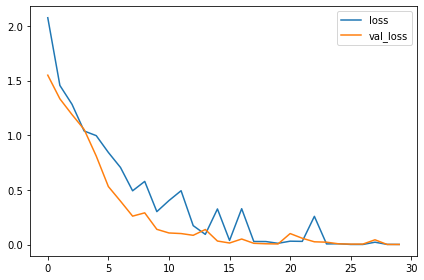

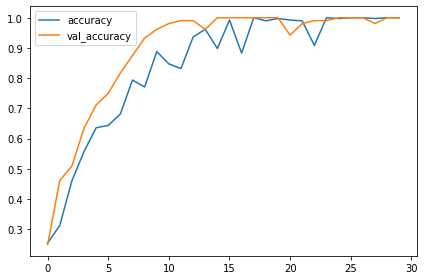

In [ ]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([

    # First Convolutional Block
    layers.Conv2D(filters=32, kernel_size=5, activation="relu", padding='same',
                  # give the input dimensions in the first layer
                  # [height, width, color channels(RGB)]
                  input_shape=[128, 128, 3]),
    layers.MaxPool2D(),

    # Second Convolutional Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Third Convolutional Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Classifier Head
    layers.Flatten(),
    layers.Dense(units=64, activation="relu"),
    layers.Dropout(.2, input_shape=(2,)),
    layers.Dense(units=32, activation="relu"),
    layers.Dropout(.2, input_shape=(2,)),
    layers.Dense(units=4, activation="softmax"),
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 128)     

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30
)

Epoch 1/30
9/9 [==============================] - 140s 6s/step - loss: 1.3851 - accuracy: 0.2824 - val_loss: 1.3816 - val_accuracy: 0.3922
Epoch 2/30
9/9 [==============================] - 19s 2s/step - loss: 1.3785 - accuracy: 0.3831 - val_loss: 1.3743 - val_accuracy: 0.4706
Epoch 3/30
9/9 [==============================] - 19s 2s/step - loss: 1.3712 - accuracy: 0.3867 - val_loss: 1.3631 - val_accuracy: 0.5948
Epoch 4/30
9/9 [==============================] - 19s 2s/step - loss: 1.3541 - accuracy: 0.4604 - val_loss: 1.3416 - val_accuracy: 0.5621
Epoch 5/30
9/9 [==============================] - 19s 2s/step - loss: 1.3352 - accuracy: 0.4838 - val_loss: 1.3048 - val_accuracy: 0.7778
Epoch 6/30
9/9 [==============================] - 19s 2s/step - loss: 1.2913 - accuracy: 0.5018 - val_loss: 1.2406 - val_accuracy: 0.5948
Epoch 7/30
9/9 [==============================] - 19s 2s/step - loss: 1.2392 - accuracy: 0.4784 - val_loss: 1.1256 - val_accuracy: 0.6471
Epoch 8/30
9/9 [=================

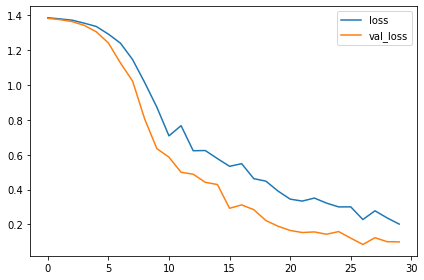

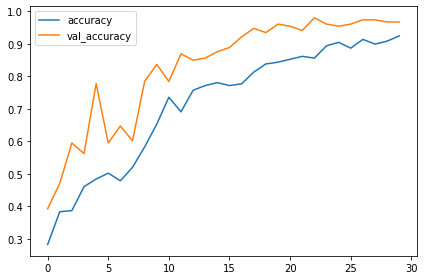

In [ ]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();